# Load Dependencies

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt   
from sklearn.preprocessing import LabelEncoder 
import cv2 
import tensorflow as tf 
from tensorflow import keras
from keras.models import load_model  
import warnings 
warnings.filterwarnings('ignore') 

# Assign Variables

In [2]:
## Lets use these images to test our model (upon reconstruction)
pto = 'df_with_name.csv'
alex_dog_german_shepherd = '/Users/aaronestes/projects/Hello_World/Poetry/test_images/alex_dog_german_shepherd.jpg'
alex_dog_lab_retriever = '/Users/aaronestes/projects/Hello_World/Poetry/test_images/alex_dog_lab_retriever.jpg'
ozzy = '/Users/aaronestes/projects/Hello_World/Poetry/test_images/ozzy.jpg'
ozzy_grandmas_house = '/Users/aaronestes/projects/Hello_World/Poetry/test_images/ozzy_grandmas_house.jpg'
preuvian_hairless_dog = '/Users/aaronestes/projects/Hello_World/Poetry/test_images/peruvian-hairless-dog.jpg'
saint_bernard = '/Users/aaronestes/projects/Hello_World/Poetry/test_images/Saint-Bernard-1.jpg'
puli = '/Users/aaronestes/projects/Hello_World/Poetry/test_images/puli.jpeg'
otterhound = '/Users/aaronestes/projects/Hello_World/Poetry/test_images/otterhound.jpeg'
airedale = '/Users/aaronestes/projects/Hello_World/Poetry/test_images/airedale.jpeg'
redbone = '/Users/aaronestes/projects/Hello_World/Poetry/test_images/redbone.jpeg'

model_name = 'x_model'
image_resize = [128, 128]

# Actual: German Shepherd. Prediction: Cairn .... way off
# test_img = alex_dog_german_shepherd

## Actual: Labrador Retriever. Prediction: Beagle
# test_img = alex_dog_lab_retriever

## Actual: Yorkshire Terrier. Prediction: Silky Terrier
# test_img = ozzy

## Actual: Yorkshire Terrier. Prediction: Beagle
# test_img = ozzy_grandmas_house

## Prediction: Rhodesian Ridgeback ... not a bad guess
# test_img = preuvian_hairless_dog

## Prediction: SAINT BERNARD!!!! NICE!!!!
# test_img = saint_bernard

## Prediction: Affenpinscher ... no
# test_img = puli

## Prediction: Airedale ... decent
# test_img = otterhound

## Prediction: Redbone
# test_img = airedale

## Prediction: Vizsla
test_img = redbone

# test_img = input("Enter path to image ...")

## Load Data

In [3]:
def read_df():
    return pd.read_csv(pto)

def encode_breed_name(df: pd.DataFrame) -> pd.DataFrame:
    df['breed'] = le.fit_transform(df['breed'])
    return df

def decode_breed_id(df: pd.DataFrame):
    df['breed'] = le.inverse_transform(df['breed'])
    return df

df = read_df()
le = LabelEncoder()
df = encode_breed_name(df) 

In [4]:
def get_num_dog_breeds(df: pd.DataFrame) -> int:
    return df['breed'].nunique()

num_dog_breeds = get_num_dog_breeds(df)

# Structure our Data Pt.1

In [5]:
def get_all_breed_ids():
    return range(1,num_dog_breeds+1)

def assign_each_breed_id_to_img() -> dict:
    return {num: test_img for num in get_all_breed_ids()}

def structure_data():
    each_breed_id_for_same_img = pd.Series(assign_each_breed_id_to_img())
    all_breed_ids = pd.Series(get_all_breed_ids())
    all_breed_ids.index += 1
    return each_breed_id_for_same_img, all_breed_ids

each_breed_id_for_same_img, all_breed_ids = structure_data()

# Structure our Data Pt.2

In [6]:
def decode_image(filepath, label=None): 
    img = tf.io.read_file(filepath) 
    img = tf.image.decode_jpeg(img) 
    img = tf.image.resize(img, image_resize) 
    img = tf.cast(img, tf.float32) / 255.0
  
    if label == None: 
        return img 
  
    return img, tf.one_hot(indices=label, 
                           depth=120, 
                           dtype=tf.float32)

def create_test_img_tensor() -> tf.data.Dataset:
    return (
        tf.data.Dataset
        .from_tensor_slices((each_breed_id_for_same_img, all_breed_ids))
        .map(decode_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
        .batch(32)
        .prefetch(tf.data.experimental.AUTOTUNE)
    )

test_img_tensor = create_test_img_tensor()

# Reconstruct Model and Predict

In [7]:
def reconstruct_model():
    return load_model(model_name)

def vectorize_img():
    return reconstructed_model.predict(test_img_tensor)

def get_highest_prob_breed():
    return np.argmax(vectorized_img)

def get_rows_for_breed_num() -> pd.DataFrame:
    return df.loc[df['breed'] == breed_num]
    
reconstructed_model = reconstruct_model()
vectorized_img = vectorize_img()
breed_num = get_highest_prob_breed()
rows_of_breed_num = get_rows_for_breed_num()
first_example_id = rows_of_breed_num.iloc[[0]].id.index[0]

4/4 [==============================] - 1s 83ms/step


# Display Prediction

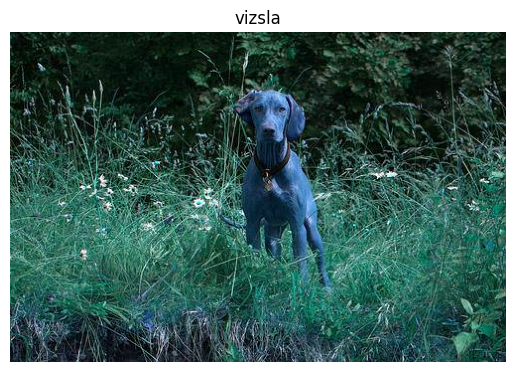

In [8]:
def get_name_of_dog() -> str:
    return [breed for breed in df.iloc[[first_example_id]].breed][0]

def use_first_filepath_as_example() -> str:
    return [filepath for filepath in df.iloc[[first_example_id]].filepath][0]

def display_prediction():
    name_dog = get_name_of_dog()
    first_fp = use_first_filepath_as_example()
    img = cv2.imread(first_fp)
    plt.axis('off')     
    plt.imshow(img)
    plt.title(name_dog)

df = decode_breed_id(df)
display_prediction()